# Machine Learning Engineer Nanodegree
## Predicting Ethereum prices using supervised machine learning

## I. Definition

### Project Overview


### Problem Statement

### Metrics

## II. Analysis

### Data Exploration

In [38]:
# Import libraries for data analysis.
import numpy as np
import pandas as pd
from datetime import datetime

In [39]:
prices = pd.read_csv('data/ethereum_price.csv')
data = pd.read_csv('data/ethereum_dataset.csv')

display(data.head(n=1))
display(prices.head(n=1))

,Date(UTC),UnixTimeStamp,eth_etherprice,eth_tx,eth_address,eth_supply,eth_marketcap,eth_hashrate,eth_difficulty,eth_blocks,eth_uncles,eth_blocksize,eth_blocktime,eth_gasprice,eth_gaslimit,eth_gasused,eth_ethersupply,eth_ens_register
0,7/30/2015,1438214400,0.0,8893,9205,7.204931e+07,0.0,11.5297,0.121,6912,1299,644,4.46,0,0,0,39316.09375,NaN


,Date,Open,High,Low,Close,Volume,Market Cap
0,"Feb 20, 2018",943.57,965.26,892.95,895.37,"2,545,260,000","92,206,500,000"


In [40]:
# Data cleansing
def format_prices(df):
    # Removing last row (price invalid)
    df = df[:len(df)-1]
    df['Market Cap'] = df['Market Cap'].apply(lambda x: float(x.replace(',','')))
    df['Volume'] = df['Volume'].apply(lambda x: float(x.replace(',','')))    
    df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x,'%b %d, %Y')) 
    return df

def format_data(df):
    df['Date(UTC)'] = df['Date(UTC)'].apply(lambda x: datetime.strptime(x,'%m/%d/%Y')) 
    return df


prices = format_prices(prices)
data = format_data(data)

/Users/nkittsteiner/Code/jupyter/venv/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/nkittsteiner/Code/jupyter/venv/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/nkittsteiner/Code/jupyter/venv/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [41]:
# TODO: format dates, clean eth, merge price with data
# TODO: Change to logarithmic scale
prices.describe()

,Open,High,Low,Close,Volume,Market Cap
count,928.000000,928.000000,928.000000,928.000000,9.280000e+02,9.280000e+02
mean,147.052745,154.525939,139.261971,147.940592,5.477870e+08,1.399749e+10
std,263.317931,277.725855,247.229954,264.230304,1.233724e+09,2.550277e+10
min,0.431589,0.482988,0.420897,0.434829,1.021280e+05,3.197360e+07
25%,7.897500,8.270000,7.615000,7.917500,6.702330e+06,6.669118e+08
50%,12.050000,12.430000,11.725000,12.030000,2.146785e+07,1.011085e+09
75%,245.407500,257.412500,224.770000,246.122500,5.329775e+08,2.270305e+10
max,1397.480000,1432.880000,1290.600000,1396.420000,9.214950e+09,1.355030e+11


In [42]:
data.describe()

,UnixTimeStamp,eth_etherprice,eth_tx,eth_address,eth_supply,eth_marketcap,eth_hashrate,eth_difficulty,eth_blocks,eth_uncles,eth_blocksize,eth_blocktime,eth_gasprice,eth_gaslimit,eth_gasused,eth_ethersupply,eth_ens_register
count,9.340000e+02,934.000000,9.340000e+02,9.340000e+02,9.340000e+02,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,9.340000e+02,9.340000e+02,9.340000e+02,934.000000,294.000000
mean,1.478540e+09,144.155814,1.769615e+05,3.475212e+06,8.547182e+07,13718.483322,37142.386082,565.982695,5470.884368,516.360814,6011.986081,16.020578,3.733017e+10,4.573157e+06,7.944123e+09,27484.238725,682.227891
std,2.333990e+07,260.446827,2.732852e+05,6.053198e+06,7.849074e+06,25214.340835,57622.685360,862.787200,773.100316,320.637714,8038.566658,3.197617,5.093189e+10,1.731189e+06,1.198038e+10,4829.841152,774.888801
min,1.438214e+09,0.000000,0.000000e+00,9.205000e+03,7.204931e+07,0.000000,11.529700,0.121000,2829.000000,126.000000,575.000000,4.460000,0.000000e+00,0.000000e+00,0.000000e+00,14852.500000,0.000000
25%,1.458367e+09,7.652500,3.008325e+04,1.244900e+05,7.826808e+07,654.651087,1396.803875,19.459250,5046.750000,352.250000,1318.000000,14.140000,2.257898e+10,3.141800e+06,9.565356e+08,24715.078125,131.500000
50%,1.478520e+09,11.965000,4.586450e+04,7.875195e+05,8.575763e+07,1004.981055,5956.319100,78.132000,5864.500000,416.500000,1623.500000,14.575000,2.416869e+10,4.310826e+06,1.579041e+09,28026.171875,341.000000
75%,1.498673e+09,228.625000,2.463598e+05,3.775781e+06,9.289034e+07,21313.163174,61147.313050,959.577000,6037.000000,498.750000,8786.750000,16.890000,5.075070e+10,5.198700e+06,1.230693e+10,31674.882812,886.250000
max,1.519085e+09,1385.020000,1.349890e+06,2.704779e+07,9.768027e+07,134210.789028,243542.069800,3031.012000,6912.000000,2096.000000,33681.000000,30.310000,9.395883e+11,7.999398e+06,4.396431e+10,39316.093750,3863.000000


In [43]:
df = prices.set_index('Date').join(data.set_index('Date(UTC)'))

### Exploratory Visualization

In [44]:
df.corr()

,Open,High,Low,Close,Volume,Market Cap,UnixTimeStamp,eth_etherprice,eth_tx,eth_address,...,eth_difficulty,eth_blocks,eth_uncles,eth_blocksize,eth_blocktime,eth_gasprice,eth_gaslimit,eth_gasused,eth_ethersupply,eth_ens_register
Open,1.000000,0.998599,0.996018,0.996401,0.907942,0.999909,0.719265,0.996382,0.965406,0.958994,...,0.827897,-0.094373,0.730936,0.928859,0.097112,-0.056558,0.790723,0.949974,-0.660917,-0.444014
High,0.998599,1.000000,0.996554,0.998536,0.918371,0.998526,0.716981,0.998420,0.967274,0.956925,...,0.822658,-0.091315,0.737161,0.929075,0.092701,-0.054324,0.788737,0.949673,-0.656950,-0.437012
Low,0.996018,0.996554,1.000000,0.997980,0.890131,0.995828,0.723856,0.997794,0.963039,0.958472,...,0.832190,-0.098087,0.725672,0.930093,0.102895,-0.059606,0.794091,0.951276,-0.667215,-0.450296
Close,0.996401,0.998536,0.997980,1.000000,0.907974,0.996268,0.720645,0.999885,0.966170,0.958083,...,0.827023,-0.093832,0.732409,0.930363,0.096884,-0.057182,0.791638,0.951524,-0.661881,-0.443123
Volume,0.907942,0.918371,0.890131,0.907974,1.000000,0.908383,0.593956,0.906779,0.899016,0.834722,...,0.663763,-0.045484,0.755813,0.829678,0.017589,-0.007111,0.674706,0.839149,-0.521170,-0.296490
Market Cap,0.999909,0.998526,0.995828,0.996268,0.908383,1.000000,0.714324,0.996281,0.964968,0.960484,...,0.824932,-0.089338,0.734288,0.926796,0.092115,-0.054568,0.787568,0.948816,-0.658546,-0.449292
UnixTimeStamp,0.719265,0.716981,0.723856,0.720645,0.593956,0.714324,1.000000,0.721352,0.753546,0.740159,...,0.792748,-0.015501,0.419706,0.786152,0.109707,-0.292227,0.752793,0.784895,-0.471926,-0.656220
eth_etherprice,0.996382,0.998420,0.997794,0.999885,0.906779,0.996281,0.721352,1.000000,0.965618,0.959349,...,0.829929,-0.096389,0.730107,0.931054,0.100167,-0.057645,0.792772,0.951630,-0.664276,-0.448694
eth_tx,0.965406,0.967274,0.963039,0.966170,0.899016,0.964968,0.753546,0.965618,1.000000,0.948697,...,0.824303,-0.059061,0.767247,0.961196,0.071385,-0.079141,0.819762,0.981466,-0.679340,-0.534415
eth_address,0.958994,0.956925,0.958472,0.958083,0.834722,0.960484,0.740159,0.959349,0.948697,1.000000,...,0.865242,-0.048276,0.700268,0.920963,0.079932,-0.084619,0.802821,0.958184,-0.691977,-0.583515


In [45]:
df.corr()['Close']

Open                0.996401
High                0.998536
Low                 0.997980
Close               1.000000
Volume              0.907974
Market Cap          0.996268
UnixTimeStamp       0.720645
eth_etherprice      0.999885
eth_tx              0.966170
eth_address         0.958083
eth_supply          0.685120
eth_marketcap       0.999769
eth_hashrate        0.939107
eth_difficulty      0.827023
eth_blocks         -0.093832
eth_uncles          0.732409
eth_blocksize       0.930363
eth_blocktime       0.096884
eth_gasprice       -0.057182
eth_gaslimit        0.791638
eth_gasused         0.951524
eth_ethersupply    -0.661881
eth_ens_register   -0.443123
Name: Close, dtype: float64

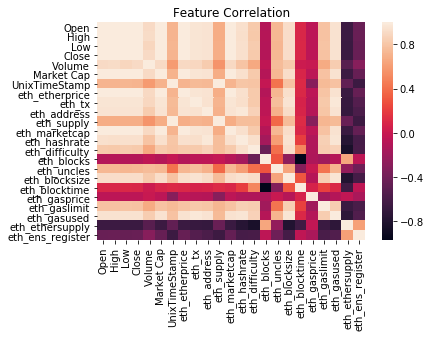

In [46]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

ax = plt.axes()
sns.heatmap(df.corr(),yticklabels=df.columns, xticklabels=df.columns, ax=ax)
ax.set_title('Feature Correlation')
plt.show()

In [47]:
fields = ['Close', 'Volume','Market Cap','eth_address', 'eth_marketcap', 'eth_tx',
          'eth_hashrate','eth_difficulty','eth_blocksize', 'eth_gasused']

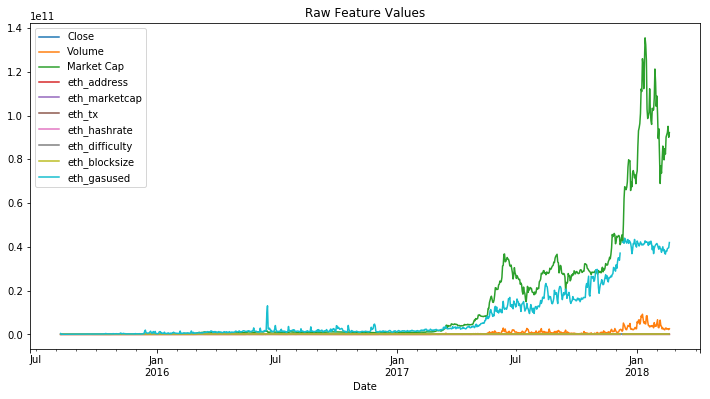

In [48]:
df[fields].plot(title='Raw Feature Values',figsize=(12,6))

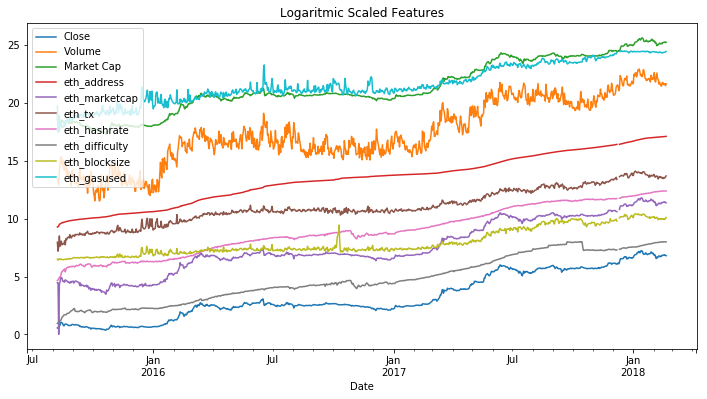

In [49]:
features_log_transformed = pd.DataFrame(data = df)
features_log_transformed[fields] = df[fields].apply(lambda x: np.log(x + 1))
features_log_transformed[fields].plot(title='Logaritmic Scaled Features', figsize=(12,6))


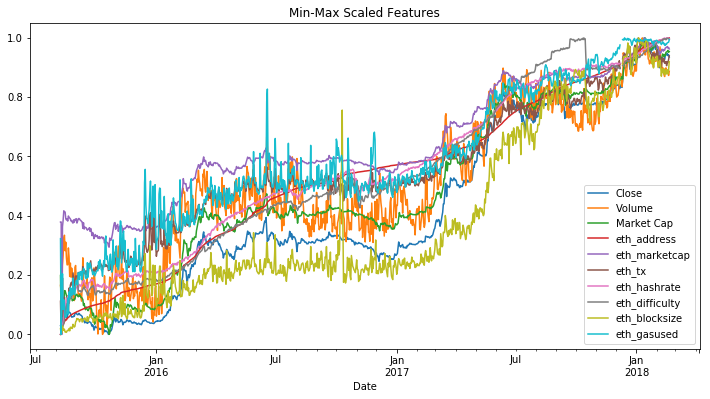

In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[fields] = scaler.fit_transform(features_log_transformed[fields])
features_log_minmax_transform[fields].plot(title='Min-Max Scaled Features', figsize=(12,6))


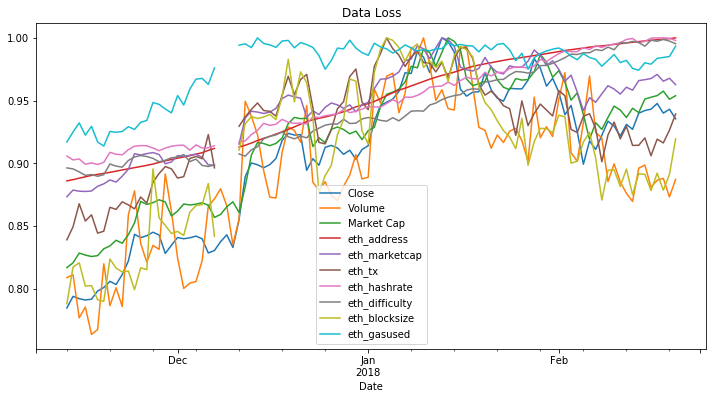

In [51]:
# Last 100 days
features_log_minmax_transform[:100][fields].plot(title='Data Loss',figsize=(12,6))

In [52]:
# Split training and test 70 / 30
model_fields = ['Volume','Market Cap','eth_address', 'eth_marketcap','eth_tx',
          'eth_hashrate','eth_difficulty','eth_blocksize', 'eth_gasused']

# Fill null values
features_log_minmax_transform = features_log_minmax_transform.fillna(method='backfill') # pad

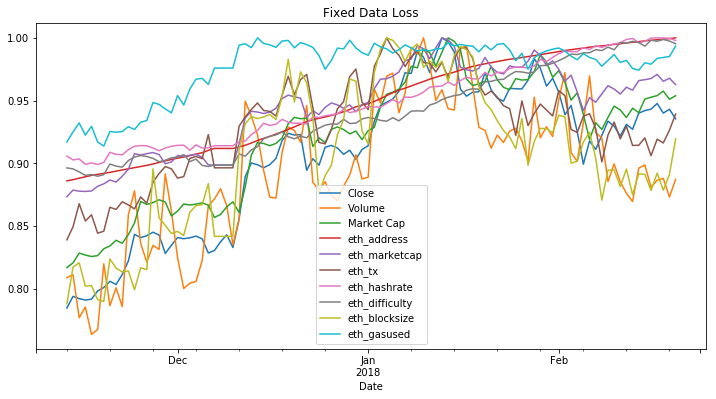

In [53]:
features_log_minmax_transform[:100][fields].plot(title='Fixed Data Loss',figsize=(12,6))

In [54]:
features_log_minmax_transform = features_log_minmax_transform.sort_index()

In [55]:
X = features_log_minmax_transform
y = features_log_minmax_transform['Close']

train_size = int(len(X)* 0.5)

# Split historical data (training uses the first cut, then the rest of the data is given to the test)

X_train, X_test = X[model_fields][0:train_size], X[model_fields][train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(y)]

#features_log_minmax_transform
print('Observations: %d' % (len(X)))
print('Training Observations: %d' % (len(X_train)))
print('Testing Observations: %d' % (len(X_test)))
print(X_train.head())
print(X_test.tail())
print(y_train.head())
print(y_test.tail())

Observations: 928
Training Observations: 464
Testing Observations: 464
              Volume  Market Cap  eth_address  eth_marketcap    eth_tx  \
Date                                                                     
2015-08-08  0.165404    0.198582     0.000000       0.378983  0.111707   
2015-08-09  0.144673    0.034463     0.003219       0.379014  0.000000   
2015-08-10  0.120801    0.035837     0.010820       0.000000  0.061652   
2015-08-11  0.233309    0.034908     0.030035       0.362990  0.190251   
2015-08-12  0.267068    0.083127     0.033165       0.385168  0.061581   

            eth_hashrate  eth_difficulty  eth_blocksize  eth_gasused  
Date                                                                  
2015-08-08      0.000000        0.000000       0.019436     0.322790  
2015-08-09      0.005721        0.006575       0.000000     0.000000  
2015-08-10      0.017862        0.013158       0.005200     0.091731  
2015-08-11      0.032102        0.022702       0.028255

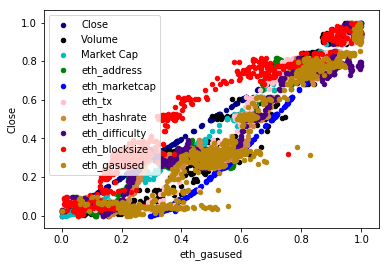

In [56]:
ax = features_log_minmax_transform.plot.scatter(x='Close', y='Close', color='DarkBlue', label='Close')
colors = ['r','k','c','g','b','pink','peru','indigo','red','darkgoldenrod']
for i in range(len(fields)):
    if fields[i] != 'Close':
        features_log_minmax_transform.plot.scatter(x=fields[i], y='Close', c=colors[i], label=fields[i], ax=ax)

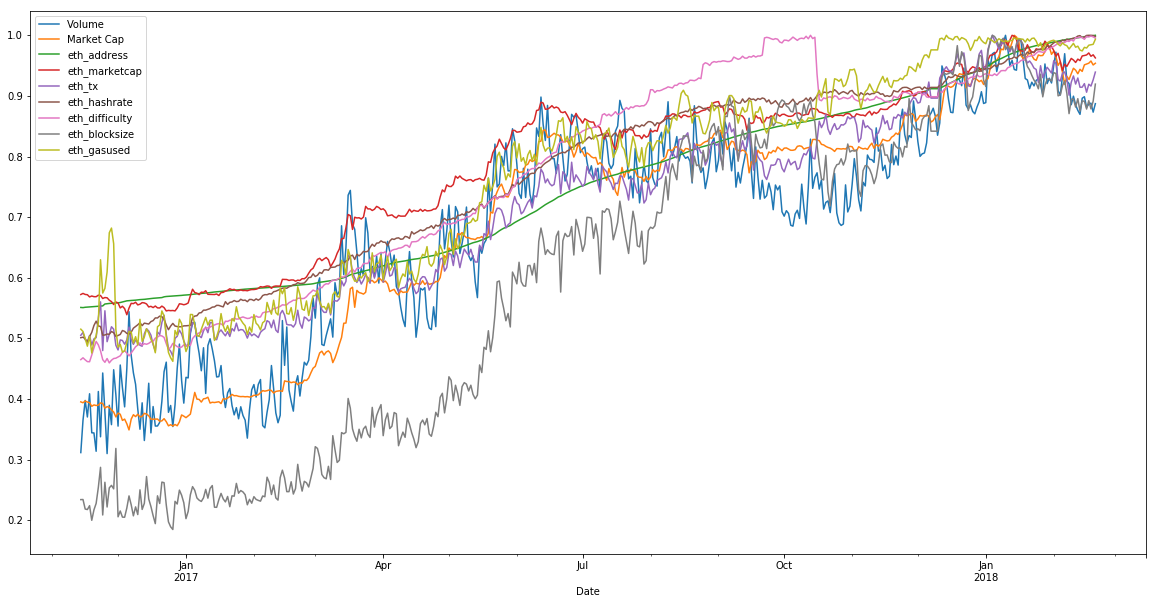

In [57]:
# Checking dates distribution
X_test[model_fields].plot(figsize=(20,10))

In [58]:
# Regression metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [59]:
# Creating a simple average predictor.
const = y_train.mean()
y_dummy = pd.DataFrame([const for x in y_train.index], index=y_train.index)
#y_dummy['train'] = y_train
#y_dummy.plot()
error = mean_squared_error(y_train, y_dummy)
r2 = r2_score(y_train, y_dummy)
print("MSE: {} R2: {}".format(error, r2))

MSE: 0.016662671176502445 R2: 0.0


### Algorithms and Techniques

Linear regression, K-Nearest Neighbors and Ensemble Methods

MSE: 0.00013790379155489955 R2: 0.9917237884553967
Testing model R2 score:0.7654767848001398, MSE: 0.012583458920500983


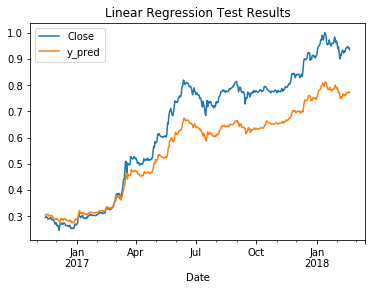

In [72]:
# Linear Regression
classifier = LinearRegression()
classifier.fit(X_train, y_train)
guesses = classifier.predict(X_train)
e1_error = mean_squared_error(y_train, guesses)
e1_r2 = r2_score(y_train, guesses)
print("MSE: {} R2: {}".format(e1_error, e1_r2))


# Test model
y_pred = classifier.predict(X_test)

temp_df = pd.DataFrame(y_test)
temp_df['y_pred'] = y_pred
temp_df.plot(title='Linear Regression Test Results')


acc = r2_score(y_test.values, y_pred)
mse = mean_squared_error(y_test.values, y_pred)
print("Testing model R2 score:{}, MSE: {}".format(acc, mse))

0.9984278254103632
MSE: 2.619662821917051e-05 R2: 0.9984278254103632
Testing model R2 score:-1.9013806360331635, MSE: 0.15567501074529908


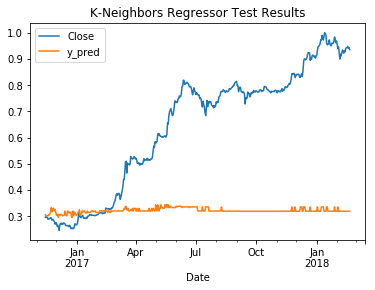

In [73]:
#K-Nearest Neighbors Regressor
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_train, y_train) 
guesses = neigh.predict(X_train)
print(neigh.score(X_train, y_train))
e2_error = mean_squared_error(y_train, guesses)
e2_r2 = r2_score(y_train, guesses)
print("MSE: {} R2: {}".format(e2_error, e2_r2))

# Test model
y_pred = neigh.predict(X_test)

temp_df = pd.DataFrame(y_test)
temp_df['y_pred'] = y_pred
temp_df.plot(title='K-Neighbors Regressor Test Results')

acc = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test.values, y_pred)
print("Testing model R2 score:{}, MSE: {}".format(acc, mse))

/Users/nkittsteiner/Code/jupyter/venv/lib/python3.7/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


MSE: 5.336613478426943e-06 R2: 0.9996797264122962
Testing model R2 score:-1.2515764648403573, MSE: 0.12080944706280128


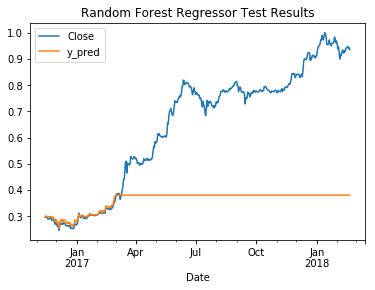

In [75]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(X_train, y_train)
guesses = forest.predict(X_train)
e3_error = mean_squared_error(y_train, guesses)
e3_r2 = r2_score(y_train, guesses)
print("MSE: {} R2: {}".format(e3_error, e3_r2))

# Test model
y_pred = forest.predict(X_test)

temp_df = pd.DataFrame(y_test)
temp_df['y_pred'] = y_pred
temp_df.plot(title='Random Forest Regressor Test Results')

acc = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Testing model R2 score:{}, MSE: {}".format(acc, mse))

MSE: 2.058313255517659e-07 R2: 0.9999876471591277
Testing model R2 score:-1.1127569154756185, MSE: 0.11336101559172065


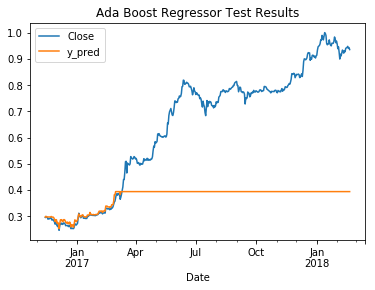

In [76]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
ada = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=10))
ada.fit(X_train, y_train)
guesses = ada.predict(X_train)
e4_error = mean_squared_error(y_train, guesses)
e4_r2 = r2_score(y_train, guesses)
print("MSE: {} R2: {}".format(e4_error, e4_r2))

# Test model
y_pred = ada.predict(X_test)

temp_df = pd.DataFrame(y_test)
temp_df['y_pred'] = y_pred
temp_df.plot(title='Ada Boost Regressor Test Results')

acc = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Testing model R2 score:{}, MSE: {}".format(acc, mse))

/Users/nkittsteiner/Code/jupyter/venv/lib/python3.7/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


MSE: 3.6092443544262154e-06 R2: 0.9997833934117648
Testing model R2 score:-1.2004196910587415, MSE: 0.11806460510403084


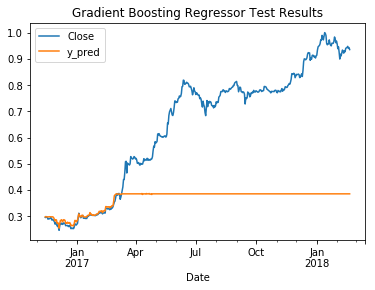

In [80]:
#SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
gbr = GradientBoostingRegressor(**params)

gbr.fit(X_train, y_train)
guesses = gbr.predict(X_train)
e5_error = mean_squared_error(y_train, guesses)
e5_r2 = r2_score(y_train, guesses)
print("MSE: {} R2: {}".format(e5_error, e5_r2))

# Test model
y_pred = gbr.predict(X_test)

temp_df = pd.DataFrame(y_test)
temp_df['y_pred'] = y_pred
temp_df.plot(title='Gradient Boosting Regressor Test Results')

acc = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Testing model R2 score:{}, MSE: {}".format(acc, mse))

### Benchmark

### Applying PCA

In [66]:
from sklearn.decomposition import PCA
n_components=1
pca = PCA(n_components=n_components) 

#Fit PCA on training set. Note: you are fitting PCA on the training set only
pca.fit(X_train)

X_train_pca = pd.DataFrame(pca.transform(X_train), columns=['PCA%i' % i for i in range(n_components)], index=X_train.index)
X_test_pca = pd.DataFrame(pca.transform(X_test), columns=['PCA%i' % i for i in range(n_components)], index=X_test.index)

#https://medium.com/@yanlinchen_99739/what-factors-affect-subway-passenger-flow-bf1dcd68c0ae

MSE: 0.001062285473838633 R2: 0.9362475882416345
Testing model R2 score:0.8348882320501514, MSE: 0.00885915344251791


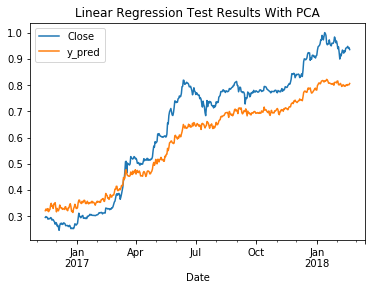

In [78]:
# Linear Regression
classifier = LinearRegression()
classifier.fit(X_train_pca, y_train)
guesses = classifier.predict(X_train_pca)
e1_error = mean_squared_error(y_train, guesses)
e1_r2 = r2_score(y_train, guesses)
print("MSE: {} R2: {}".format(e1_error, e1_r2))


# Test model
y_pred = classifier.predict(X_test_pca)

temp_df = pd.DataFrame(y_test)
temp_df['y_pred'] = y_pred
temp_df.plot(title='Linear Regression Test Results With PCA')


acc = r2_score(y_test.values, y_pred)
mse = mean_squared_error(y_test.values, y_pred)
print("Testing model R2 score:{}, MSE: {}".format(acc, mse))

1.0
MSE: 0.0 R2: 1.0
Testing model R2 score:-1.8706311080214926, MSE: 0.15402512963553386


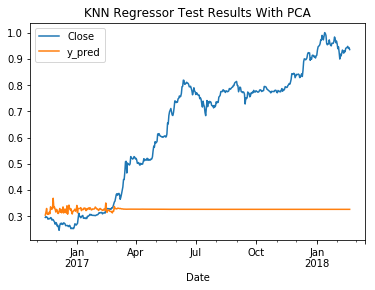

In [79]:
#K-Nearest Neighbors Regressor
from sklearn.neighbors import KNeighborsRegressor
params = {
    'algorithm':'brute', 
    'leaf_size':1, 
    'metric':'minkowski',
    'n_neighbors':4, 
    'p':2,
    'weights':'distance'
}

neigh = KNeighborsRegressor(algorithm='brute', leaf_size=1, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=4, p=2,
          weights='distance')
neigh.fit(X_train_pca, y_train) 
guesses = neigh.predict(X_train_pca)
print(neigh.score(X_train_pca, y_train))
e2_error = mean_squared_error(y_train, guesses)
e2_r2 = r2_score(y_train, guesses)
print("MSE: {} R2: {}".format(e2_error, e2_r2))

# Test model
y_pred = neigh.predict(X_test_pca)

temp_df = pd.DataFrame(y_test)
temp_df['y_pred'] = y_pred
temp_df.plot(title='KNN Regressor Test Results With PCA')


acc = r2_score(y_test.values, y_pred)
mse = mean_squared_error(y_test.values, y_pred)
print("Testing model R2 score:{}, MSE: {}".format(acc, mse))

/Users/nkittsteiner/Code/jupyter/venv/lib/python3.7/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


MSE: 7.835215433879544e-05 R2: 0.9952977434704895
Testing model R2 score:-1.6330228827080635, MSE: 0.14127614297399307


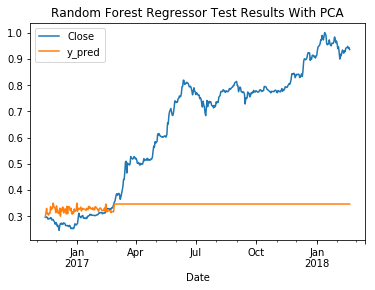

In [81]:
#K-Nearest Neighbors Regressor
forest = RandomForestRegressor()
forest.fit(X_train_pca, y_train)
guesses = forest.predict(X_train_pca)
e3_error = mean_squared_error(y_train, guesses)
e3_r2 = r2_score(y_train, guesses)
print("MSE: {} R2: {}".format(e3_error, e3_r2))

# Test model
y_pred = forest.predict(X_test_pca)

temp_df = pd.DataFrame(y_test)
temp_df['y_pred'] = y_pred
temp_df.plot(title='Random Forest Regressor Test Results With PCA')


acc = r2_score(y_test.values, y_pred)
mse = mean_squared_error(y_test.values, y_pred)
print("Testing model R2 score:{}, MSE: {}".format(acc, mse))

In [69]:
# Apply cross validation 
"""
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

parameters = {'n_neighbors': [x for x in range(1, 20)],
              'leaf_size': [x for x in range(1,100)],
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
             }
scorer = make_scorer(r2_score)

clf = KNeighborsRegressor()

grid_obj = GridSearchCV(clf, parameters, scoring=scorer)
grid_fit = grid_obj.fit(X_train, y_train)
best_clf = grid_fit.best_estimator_
print(best_clf)
"""

"\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.metrics import make_scorer\n\nparameters = {'n_neighbors': [x for x in range(1, 20)],\n              'leaf_size': [x for x in range(1,100)],\n              'weights': ['uniform', 'distance'],\n              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']\n             }\nscorer = make_scorer(r2_score)\n\nclf = KNeighborsRegressor()\n\ngrid_obj = GridSearchCV(clf, parameters, scoring=scorer)\ngrid_fit = grid_obj.fit(X_train, y_train)\nbest_clf = grid_fit.best_estimator_\nprint(best_clf)\n"

In [70]:
def test_model_timeseries_split(classifier, X_train, y_train, X_test, y_test):
    print(type(classifier))
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    #temp_df = pd.DataFrame(y_test)
    #temp_df['y_pred'] = y_pred
    #temp_df.plot()

    acc = r2_score(y_test.values, y_pred)
    mse = mean_squared_error(y_test.values, y_pred)
    print("Testing model R2 score:{}, MSE: {}".format(acc, mse))    

In [71]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

models = [
    {'model': LinearRegression()},
    {'model': KNeighborsRegressor(n_neighbors=2)},
]

print(tscv) 
for train_i, test_i in tscv.split(X):
    print("%s %s %s %s" % (min(train_i), max(train_i), min(test_i), max(test_i)))
    print(len(X[min(train_i):max(train_i)]))
    print(len(X[min(test_i):max(test_i)]))
    for m in models:
         test_model_timeseries_split(m['model'], X[model_fields][min(train_i):max(train_i)], 
                                        y[min(train_i):max(train_i)],
                                        X[model_fields][min(test_i):max(test_i)],
                                        y[min(test_i):max(test_i)])

TimeSeriesSplit(max_train_size=None, n_splits=5)
0 157 158 311
157
153
<class 'sklearn.linear_model.base.LinearRegression'>
Testing model R2 score:-0.7129517249589836, MSE: 0.011294566560716049
<class 'sklearn.neighbors.regression.KNeighborsRegressor'>
Testing model R2 score:-6.692136792860666, MSE: 0.050719089005954315
0 311 312 465
311
153
<class 'sklearn.linear_model.base.LinearRegression'>
Testing model R2 score:-2.5995194188723114, MSE: 0.0007319084796334712
<class 'sklearn.neighbors.regression.KNeighborsRegressor'>
Testing model R2 score:-3.312191497525446, MSE: 0.0008768196960668182
0 465 466 619
465
153
<class 'sklearn.linear_model.base.LinearRegression'>
Testing model R2 score:0.9202759211893945, MSE: 0.0006669782964091113
<class 'sklearn.neighbors.regression.KNeighborsRegressor'>
Testing model R2 score:-0.02934612124485758, MSE: 0.00861159555062669
0 619 620 773
619
153
<class 'sklearn.linear_model.base.LinearRegression'>
Testing model R2 score:0.766613492847326, MSE: 0.00154